<a href="https://colab.research.google.com/github/a01750661-gif/TI3001C.101/blob/Actividades/A3_3_1_An%C3%A1lisis_Base_Datos_de_un_Evento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Módulo 3: Actividad 2**
#


**Fernando Manuel Chiñas Salinas, A00832747**

**Cory Bryan Contreras Cedillo, A01750661**

**Carlos Alberto Paez de la Cruz, A01703050**

**Ivan Andres Perez Fletes, A01664560**

**José Antonio Amaya A01657**

**Ana V. Roldán Borja, A01657751**


TI3001C

Grupo 101

Campus Ciudad de México

29 de agosto de 2025

# Carga de Librerías

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
from kagglehub import KaggleDatasetAdapter

import warnings
warnings.filterwarnings('ignore')

# Carga de Base de Datos

In [ ]:
file_path = "Titanic-Dataset.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "yasserh/titanic-dataset",
  file_path,
)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Presentación de los Datos: ¿Qué Atributos del Evento se Pueden Medir?

## Edad

In [ ]:
#Analizamos medidas de tendencia central en cuanto a la edad de los pasajeros
df['Age'].describe()
#Usando esta función podemos ver las principales medidas, la edad promedio es de 29 años
#La desviación estándar es de 14.52 años lo cual nos indica un amplio rango de edades, con una concentración marcada entre 20 y 40
#La edad mínima es de 0.42 años, mientras que la mayor es de 80

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [ ]:
df['Age'].median(), df['Age'].mode()

(28.0,
 0    24.0
 Name: Age, dtype: float64)

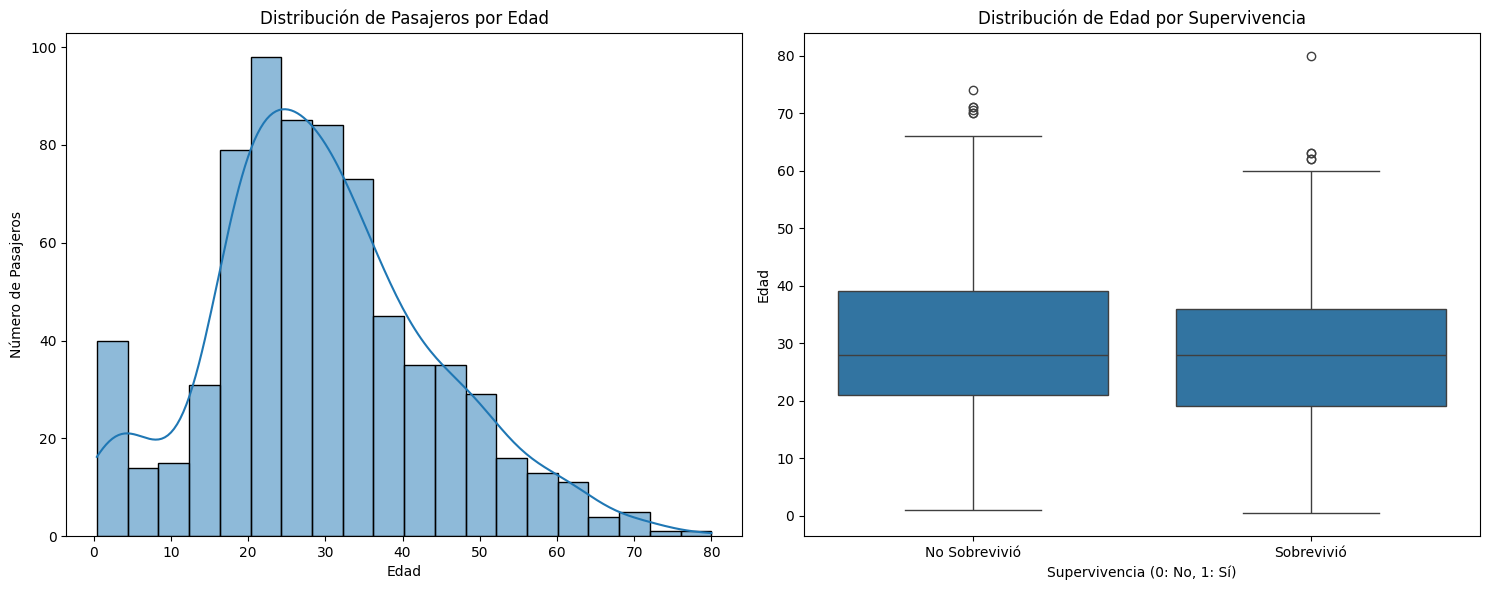

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Age Distribution
sns.histplot(data=df, x='Age', bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribución de Pasajeros por Edad')
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Número de Pasajeros')

# Plot 2: Age Distribution by Survival
sns.boxplot(data=df, x='Survived', y='Age', ax=axes[1])
axes[1].set_title('Distribución de Edad por Supervivencia')
axes[1].set_xlabel('Supervivencia (0: No, 1: Sí)')
axes[1].set_ylabel('Edad')
axes[1].set_xticks([0, 1], ['No Sobrevivió', 'Sobrevivió'])

plt.tight_layout()
plt.show()
##Conclusión, la edad no fue tan influyente en la tasa de supervivencia, factores como el sexo de los pasajeros y la clase a la que pertenecían tuvieron más impacto

## Relación "Fare-Survived"

Tasa de supervivenvia por categoria de tarifa: 
FareCategory
Bajo     19.81%
Medio    40.28%
Alto     55.93%
Name: Survived, dtype: object


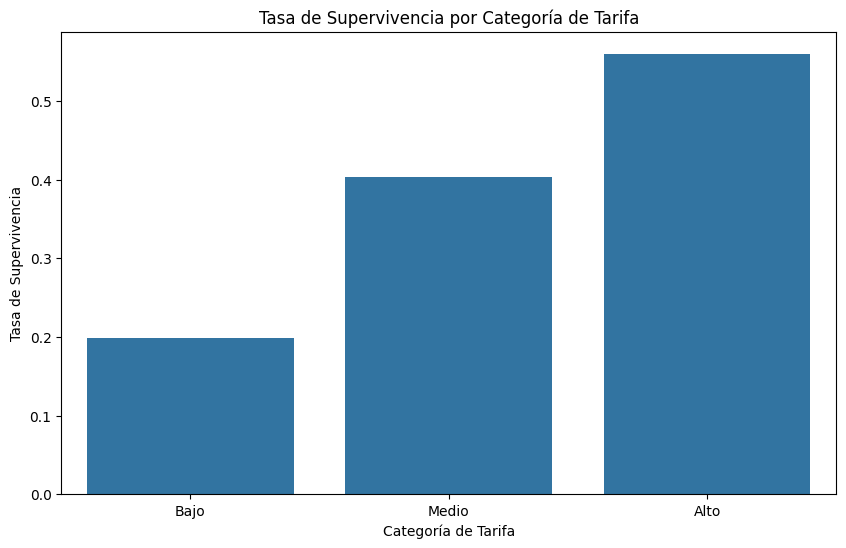

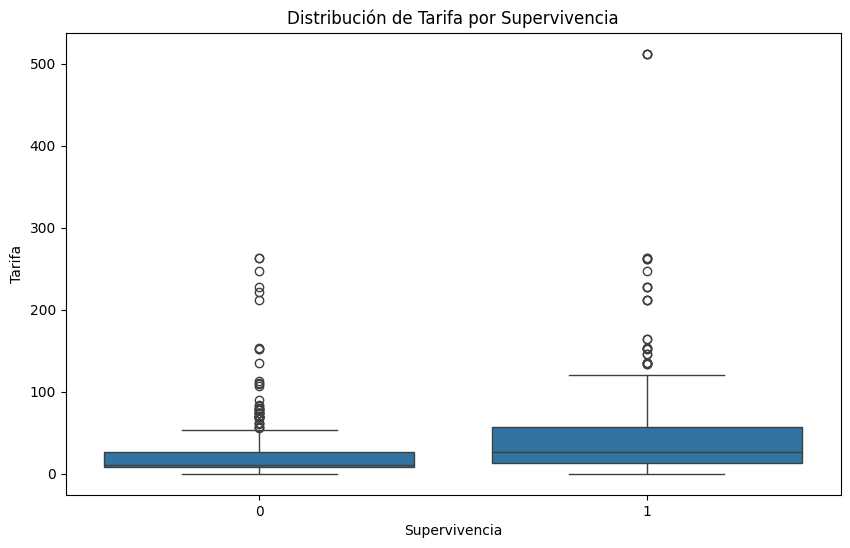

In [ ]:
# Para el análisis del atributo extra, utilizamos la relación fare-survived

# 1: primero creamos categorias de tarifa por terciles (bajo, medio y alto)

df["FareCategory"] = pd.qcut(df["Fare"], 3, labels=["Bajo", "Medio", "Alto"])

# 2: Ahora hacemos la tasa de supervivencia por categoría de la tarifa
# agrupamos por la nueva columna FareCategory y luego ordenamos con respecto a Survived
fare_survival = df.groupby('FareCategory')['Survived'].mean().sort_index()

print("Tasa de supervivenvia por categoria de tarifa: ")
# convertimos la sproporciones a porcentaje y mostramos la serie con indice Bajo, medio y alto
print((fare_survival * 100).round(2).astype(str)+"%")


# 3: Barra de supervivencia por categoría
plt.figure(figsize=(10,6)) # creamos una figura de 10x6
sns.barplot(x=fare_survival.index, y=fare_survival.values) # data que utilizamos
# imprimimos titulos y etiquetas
plt.title("Tasa de Supervivencia por Categoría de Tarifa")
plt.xlabel("Categoría de Tarifa")
plt.ylabel("Tasa de Supervivencia")
plt.show()



# 4: BOXPLOT de tarifas por supervivencia
# esto es un extra para mostrar la distribución de preciosen sobrevivientes vs no sibrevivientes

plt.figure(figsize=(10,6)) # creamos una figura de 10x6
sns.boxplot(x="Survived", y="Fare", data=df) # dta que utilizamos
# imprimimos titulos y etiquetas
plt.title("Distribución de Tarifa por Supervivencia")
plt.xlabel("Supervivencia")
plt.ylabel("Tarifa")
plt.show()

# Identificar y Analizar un Evento Raro o Grupo de Alto Riesgo Dentro del Conjunto de Datos del Titanic

En nuestro caso, identificamos un grupo de alto riesgo en el contexto de la supervivencia de pasajeros en el Titanic: pasajeros de segunda o tercera clase con edad mayor a 50. En este caso, el riesgo proviene de la intersección de pertenecer a dos grupos vulnerables diferentes. En los pocos barcos salvavidas, se le dio preferencia los de primera clase. Además, la edad hace que desplazarse por el barco en una situación extrema sea más difícil, reduciendo aún más esta probabilidad.

A continuación, realizaremos un análisis estadístico descriptivo para observar la distribución de este grupo de alto riesgo. Como primera parte, añadiremos una nueva columna al dataset que indique si el pasajero pertenece o no al grupo de riesgo definido.

In [ ]:
df_risk = df.copy() # Copiamos el dataframe para no modificar el original
df_risk.head() # Muestra primeros 5 resultados

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Bajo
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Alto
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Bajo
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Alto
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Bajo


Conteo de pasajeros de alto riesgo: 25
Porcentaje de pasajeros de alto riesgo: 2.81%


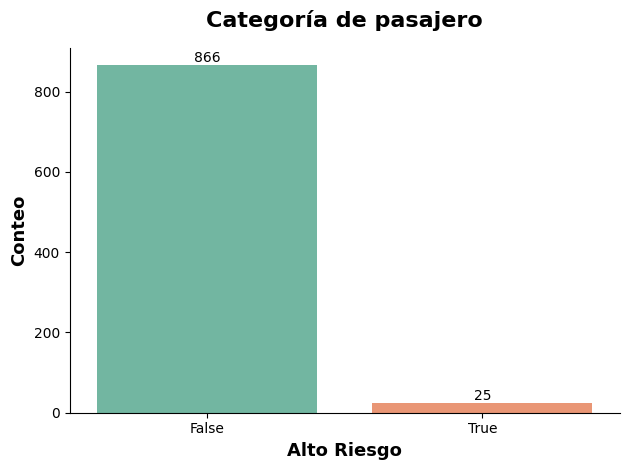

In [ ]:
filter = (df_risk["Pclass"] != 1) & (df_risk["Age"] > 50) # Creamos un filtro para determinar aquellos pasajeros de 2da o 3era clase cuya edad es mayor a 50
df_risk["HighRisk"] = filter # Añadimos una columna basada en el filtro para hacer más fácil el análisis

print(f"Conteo de pasajeros de alto riesgo: {df_risk['HighRisk'].sum()}") # utilizamos el conteo con .sum para poder hacer el conteo de pasajeros de alto riesgo
print(f"Porcentaje de pasajeros de alto riesgo: {df_risk['HighRisk'].mean() * 100:.2f}%") # hacemos el

fig, ax = plt.subplots()
sns.countplot(
    x="HighRisk", data=df_risk,
    palette="Set2", ax=ax
)

# Muestra conteo
for container in ax.containers:
    ax.bar_label(container, fmt="%d")

# Títulos
ax.set_title("Categoría de pasajero", fontsize=16, weight="bold", pad=15)
ax.set_xlabel("Alto Riesgo", fontsize=13, weight="semibold")
ax.set_ylabel("Conteo", fontsize=13, weight="semibold")

# Layout
sns.despine(ax=ax)
plt.tight_layout()

Podemos observar que únicamente 25 (o un 2.8%) del total de pasajeros pertenecen a nuestra categoría de riesgo.  
Una vez teniendo identificados a los pasajeros del grupo de riesgo, comenzaremos por estudiar el conteo de supervivientes dependiendo del grupo al que pertenecen. Para esto, el mejor gráfico es uno de barras, debido a que queremos estudiar un conteo discreto separado por categorías

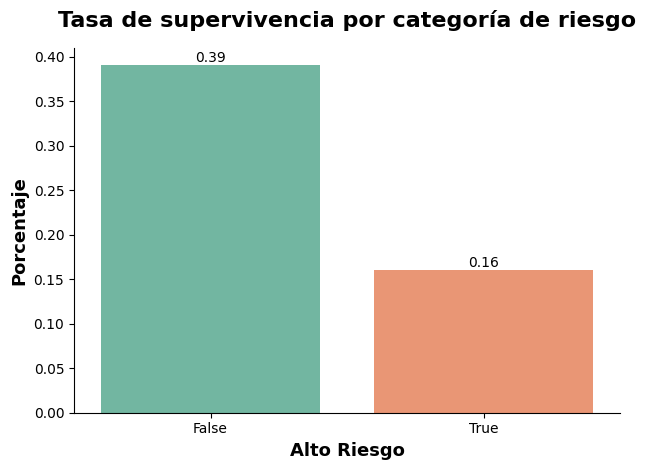

In [ ]:
fig, ax = plt.subplots()
sns.barplot(
    x="HighRisk", y="Survived",
    data=df_risk,
    palette="Set2", ax=ax, ci=None, estimator="mean"
)

# Añade porcentajes
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f")

# Titulos
ax.set_title("Tasa de supervivencia por categoría de riesgo", fontsize=16, weight="bold", pad=15)
ax.set_xlabel("Alto Riesgo", fontsize=13, weight="semibold")
ax.set_ylabel("Porcentaje", fontsize=13, weight="semibold")

# Layout
sns.despine(ax=ax)
plt.tight_layout()

A partir del gráfico anterior, podemos observar que únicamente el 16% de los pasajeros de alto riesgo sobrevivieron, mientras que el 39% de los pasajeros fuera de esta categoría sobrevivieron. Esto nos indica que pertenecer a este grupo de riesgo sí disminuye significativamente la probabilidad de supervivencia.

Veremos ahora cómo influye la edad para la supervivencia del grupo de pasajeros de alto riesgo

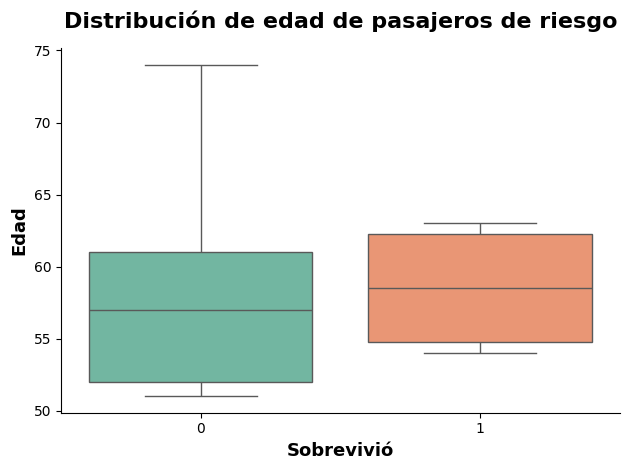

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(
    x="Survived", y="Age",
    data=df_risk[df_risk["HighRisk"]==True],
    palette="Set2", ax=ax
)

# Títulos
ax.set_title("Distribución de edad de pasajeros de riesgo", fontsize=16, weight="bold", pad=15)
ax.set_xlabel("Sobrevivió", fontsize=13, weight="semibold")
ax.set_ylabel("Edad", fontsize=13, weight="semibold")

# Layout
sns.despine(ax=ax)
plt.tight_layout()

El gráfico anterior nos revela más información interesante: la mediana de edad de los pasajeros de riesgo que sobrevivieron es ligeramente alta que la de aquellos que no sobrevivieron. Sin embargo, podemos ver que la distribución de aquellos que sí sobrevivieron es más compacta: la mayoría está entre 55 y 62 años. Por otra parte, de los que no sobrevivieron, hay valores tan grandes como hasta 75 años. Lo que podemos concluir de aquí es que si bien tener edades entre 50 y 60 años no influye demasiado en el resultado de supervivencia, los pasajeros con edades muy elevadas no sobrevivieron.

A continuación, analizaremos cómo el sexo afectó a la supervivencia del grupo de riesgo

<Axes: xlabel='Sex', ylabel='HighRisk'>

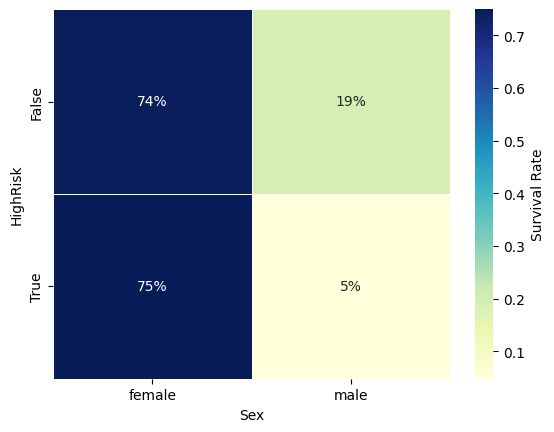

In [ ]:
pivot = df_risk.pivot_table(
    index="HighRisk",
    columns="Sex",
    values="Survived",
    aggfunc="mean"
)

fig, ax = plt.subplots()
sns.heatmap(
    data=pivot,
    annot=True,
    fmt=".0%",
    cmap="YlGnBu",
    cbar_kws={"label": "Survival Rate"},
    linewidths=0.5,
    linecolor="white",
    ax=ax
)

El mapa de calor anterior nos muestra más información interesante: la tasa de supervivencias de mujeres es prácticamente la misma entre las mujeres pertenecientes al grupo de alto riesgo como las que no. Sin embargo, la diferencia para la tasa de supervivencia en hombres es significativa: sólo el 5% de los hombres en el grupo sobrevivió, mientras que el 19% de los hombres fuera del grupo sobrevivó. Esto nos lleva a concluir que el factor de riesgo principal es el sexo del pasajero, pues incluso en el grupo definido la tasa de supervivencia de mujeres se mantiene sin cambios con respecto al grupo normal.

# Función de Distribución Acumulativa Complementaria

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
FareCategory      0
dtype: int64
[0.00140056 0.00280112 0.00420168 0.00560224 0.0070028  0.00840336
 0.00980392 0.01120448 0.01260504 0.0140056  0.01540616 0.01680672
 0.01820728 0.01960784 0.0210084  0.02240896 0.02380952 0.02521008
 0.02661064 0.0280112  0.02941176 0.03081232 0.03221289 0.03361345
 0.03501401 0.03641457 0.03781513 0.03921569 0.04061625 0.04201681
 0.04341737 0.04481793 0.04621849 0.04761905 0.04901961 0.05042017
 0.05182073 0.05322129 0.05462185 0.05602241 0.05742297 0.05882353
 0.06022409 0.06162465 0.06302521 0.06442577 0.06582633 0.06722689
 0.06862745 0.07002801 0.07142857 0.07282913 0.07422969 0.07563025
 0.07703081 0.07843137 0.07983193 0.08123249 0.08263305 0.08403361
 0.08543417 0.08683473 0.08823529 0.08963585 0.09103641 0

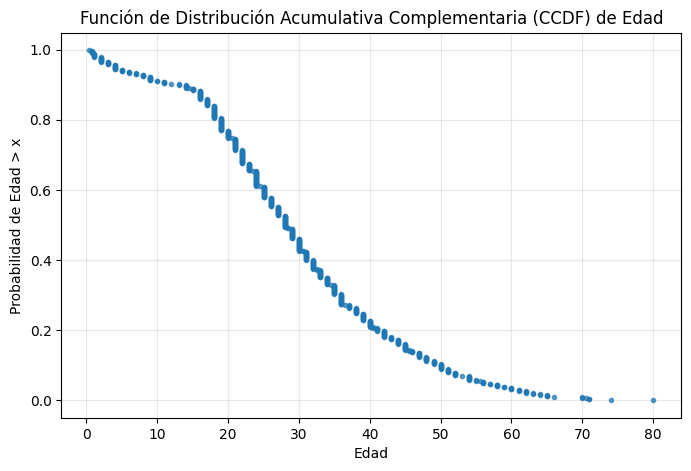

0.03501400560224088


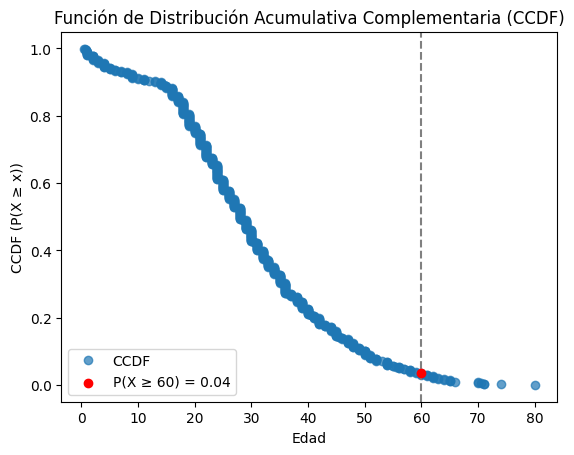

In [ ]:
print(df.isna().sum()) # Cuenta cuántos valores faltantes (NaN: "not a number") hay en cada columna.
# Antes de estimar una distribución, se debe definir bien el universo de datos observados.
edades = df["Age"].dropna() # Toma la columna Age y elimina los NaN anteriores.
edades = edades.sort_values() # Ordena las edades de menor a mayor.
# En cada posición, se sabe cuántos valores están por debajo de x, lo que permite calcular la CDF.
# Esto es k.
n = len(edades) # Guarda el tamaño de la muestra.
# n es el denominador en las probabilidades (frecuencias relativas k/n).
cdf = np.arange(1, n+1) / n # Crea una lista de números del 1 hasta n (cada número representa la posición k de cada valor ordenado en la muestra), y divide entre n.
# Así, k/n se traduce en la probabilidad acumulada hasta ese valor (x, i.e. cada edad), dividido por el total de datos (así se obtiene la fracción de datos acumulados).
print(cdf) # La CDF "acumula la probabilidad de los datos anteriores" (e.g. CDF en 26 años podría ser que 40% de los pasajeros tienen 26 años *o* menos), hasta llegar hasta 1 (100%).

# "El CCDF se define como la probabilidad de que una variable aleatoria X tome un valor mayor o igual a un cierto valor x".
ccdf = 1 - cdf
print(ccdf) # Por ello, es el complemento de la CDF.
# Graficando:
plt.figure(figsize = (8, 5))
plt.plot(edades, ccdf, marker = ".", linestyle = "none", alpha = 0.7) # Eje x es "edades", eje y es la CCDF calculada.
plt.title("Función de Distribución Acumulativa Complementaria (CCDF) de Edad")
plt.xlabel("Edad")
plt.ylabel("Probabilidad de Edad > x")
plt.grid(True, alpha = 0.3)
plt.show()

# ¿Qué probabilidad existe de que edad tome un valor mayor o igual a 60?
prob_60 = ccdf[edades >= 60].max() # Con la CCDF calculada, toma aquellas edades mayores o iguales a 60 y se queda con el valor máximo, que corresponde a la probabilidad buscada.
print(prob_60)
plt.plot(edades, ccdf, marker="o", linestyle="none", alpha=0.7, label="CCDF")
# Graficando:
plt.scatter(60, prob_60, color="red", zorder=5, label=f"P(X ≥ 60) = {prob_60:.2f}") # Punto para facilitar identificación de dónde está la edad 60.
plt.axvline(60, color="gray", linestyle="--") # Línea para facilitar identificación de la edad 60.
plt.xlabel("Edad")
plt.ylabel("CCDF (P(X ≥ x))")
plt.title("Función de Distribución Acumulativa Complementaria (CCDF)")
plt.legend() # Cuadro para facilitar identificación de qué representa el punto rojo.
plt.show()

**Interpretación**

Al observar la CCDF de la variable "Edad" en la base de datos del Titanic, se puede ver cómo la probabilidad de encontrar pasajeros mayores disminuye a medida que se avanza hacia edades más altas. Esto significa que la mayor parte de los pasajeros se concentra en edades jóvenes o medias, mientras que los adultos mayores representan la cola de la distribución, con probabilidades cada vez menores. Así pues, la curva cae rápido a medida que aumenta la edad: por ejemplo, la probabilidad de tener más de 40 años ya es bastante baja, y por encima de 60 prácticamente se acerca a cero. Desde un punto de vista técnico, la CCDF permite el enfoque precisamente en esa cola, destacando los valores extremos (pasajeros de edad avanzada) y facilitando la comprensión de la probabilidad de eventos raros dentro del conjunto de datos, algo útil cuando se analiza la distribución de características poco frecuentes o atípicas en contextos como modelado de riesgos o detección de anomalías. Desde una perspectiva que toma en cuenta el contexto el evento, históricamente tiene sentido. Los viajes transatlánticos eran largos, costosos y físicamente exigentes, por lo que quienes más viajaban eran familias jóvenes, trabajadores o migrantes en busca de oportunidades.